In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from scipy import stats
import tensorflow as tf
import seaborn as sns
from pylab import rcParams
from sklearn.model_selection import train_test_split
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers

In [2]:
train_df = pd.read_csv(r"D:\다운로드\archive/newKDDTrain+.txt", header=None)

columns = [
    'duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land',
    'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
    'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
    'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count',
    'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate',
    'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
    'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
    'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
    'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'class'
]
# Rename the columns of the DataFrame
train_df.columns = columns

train_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [3]:
test_df =  pd.read_csv(r"D:\다운로드\archive/newKDDTest+.txt", header=None)

test_columns = [
    'duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land',
    'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
    'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
    'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count',
    'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate',
    'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
    'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
    'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
    'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'class'
]
# Rename the columns of the DataFrame
test_df.columns = columns

test_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,private,REJ,0,0,0,0,0,0,...,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,anomaly
1,0,tcp,private,REJ,0,0,0,0,0,0,...,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,anomaly
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,anomaly
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,anomaly


In [4]:
kdd_df = pd.concat([train_df, test_df])

In [5]:
kdd_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [6]:
kdd_df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'class'],
      dtype='object')

In [7]:
kdd_df['service'].value_counts()

http         48191
private      26627
domain_u      9937
smtp          8247
ftp_data      7711
             ...  
tftp_u           4
http_8001        2
aol              2
harvest          2
http_2784        1
Name: service, Length: 70, dtype: int64

In [8]:
kdd_df['protocol_type'].value_counts()

tcp     121569
udp      17614
icmp      9334
Name: protocol_type, dtype: int64

In [9]:
kdd_df['Label'] = kdd_df['class'].apply(lambda x: 0 if x == 'normal' else 1)


In [10]:
kdd_df['Label'].value_counts()

0    77054
1    71463
Name: Label, dtype: int64

In [11]:
kdd_df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,Label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,0
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,0
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly,1
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,0
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,tcp,smtp,SF,794,333,0,0,0,0,...,0.72,0.06,0.01,0.01,0.01,0.00,0.00,0.00,normal,0
22540,0,tcp,http,SF,317,938,0,0,0,0,...,1.00,0.00,0.01,0.01,0.01,0.00,0.00,0.00,normal,0
22541,0,tcp,http,SF,54540,8314,0,0,0,2,...,1.00,0.00,0.00,0.00,0.00,0.00,0.07,0.07,anomaly,1
22542,0,udp,domain_u,SF,42,42,0,0,0,0,...,0.99,0.01,0.00,0.00,0.00,0.00,0.00,0.00,normal,0


In [12]:
# 프로토콜 매핑 사전
protocol_map = {
    'tcp': 6,    # TCP
    'udp': 17,   # UDP
    'icmp': 1    # ICMP
}

# 나머지 값은 0으로 처리
kdd_df['Protocol_Mapped'] = kdd_df['protocol_type'].str.lower().map(protocol_map).fillna(0).astype(int)

kdd_df['Protocol'] = kdd_df['Protocol_Mapped']
kdd_df = kdd_df.drop(labels='Protocol_Mapped', axis=1)

In [13]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding 적용
label_encoder = LabelEncoder()
kdd_df['service'] = label_encoder.fit_transform(kdd_df['service'])
kdd_df['flag'] = label_encoder.fit_transform(kdd_df['flag'])

# 인코딩된 데이터프레임 확인
print(kdd_df.head())

   duration protocol_type  service  flag  src_bytes  dst_bytes  land  \
0         0           tcp       20     9        491          0     0   
1         0           udp       44     9        146          0     0   
2         0           tcp       49     5          0          0     0   
3         0           tcp       24     9        232       8153     0   
4         0           tcp       24     9        199        420     0   

   wrong_fragment  urgent  hot  ...  dst_host_diff_srv_rate  \
0               0       0    0  ...                    0.03   
1               0       0    0  ...                    0.60   
2               0       0    0  ...                    0.05   
3               0       0    0  ...                    0.00   
4               0       0    0  ...                    0.00   

   dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
0                         0.17                         0.00   
1                         0.88                         0.00   

In [14]:
kdd_df = kdd_df.drop(labels = 'protocol_type', axis=1)

In [15]:
kdd_df = kdd_df.drop(labels='class',axis=1)

In [16]:
from imblearn.over_sampling import SMOTE
from collections import Counter
import numpy as np
import pandas as pd

# ✅ kdd_df에서 feature와 label 분리
X = kdd_df.drop('Label', axis=1)
y = kdd_df['Label']

# ✅ NumPy 배열로 변환
X_np = X.to_numpy()
y_np = y.to_numpy()

# ✅ 기존 클래스 비율 확인
print("Before SMOTE (kdd_df):", Counter(y_np))

# ✅ SMOTE 실행 (비율 1:1)
smote = SMOTE(sampling_strategy=1, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_np, y_np)

# ✅ SMOTE 후 클래스 비율 확인
print("After SMOTE (kdd_df):", Counter(y_resampled))

# ✅ 다시 DataFrame으로 변환
X_resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
y_resampled_series = pd.Series(y_resampled, name='Label', dtype=int)

# ✅ 합치기
smote_kdd_df = pd.concat([X_resampled_df, y_resampled_series], axis=1)

# ✅ 결과 확인
print(smote_kdd_df.head())


Before SMOTE (kdd_df): Counter({0: 77054, 1: 71463})
After SMOTE (kdd_df): Counter({0: 77054, 1: 77054})
   duration  service  flag  src_bytes  dst_bytes  land  wrong_fragment  \
0       0.0     20.0   9.0      491.0        0.0   0.0             0.0   
1       0.0     44.0   9.0      146.0        0.0   0.0             0.0   
2       0.0     49.0   5.0        0.0        0.0   0.0             0.0   
3       0.0     24.0   9.0      232.0     8153.0   0.0             0.0   
4       0.0     24.0   9.0      199.0      420.0   0.0             0.0   

   urgent  hot  num_failed_logins  ...  dst_host_same_srv_rate  \
0     0.0  0.0                0.0  ...                    0.17   
1     0.0  0.0                0.0  ...                    0.00   
2     0.0  0.0                0.0  ...                    0.10   
3     0.0  0.0                0.0  ...                    1.00   
4     0.0  0.0                0.0  ...                    1.00   

   dst_host_diff_srv_rate  dst_host_same_src_port_rat

In [17]:
df = smote_kdd_df

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(kdd_df, test_size=0.1, random_state=42)
X_train.shape, X_test.shape

((133665, 42), (14852, 42))

In [19]:
y_train = X_train['Label']
X_train = X_train.drop(labels='Label',axis=1)

y_test = X_test['Label']
X_test = X_test.drop(labels='Label',axis=1)


누적 분산 비율 (cumulative explained variance):
[0.18941697 0.31813448 0.38629438 0.43792771 0.4852069  0.52878056
 0.56675688 0.60079364 0.62915539 0.65597924 0.68178781 0.70737016
 0.7323732  0.75731018 0.78211875 0.80686494 0.83066075 0.85380142
 0.87324156 0.8918628  0.90766361 0.92262695 0.9346447  0.94614764
 0.95665225]
Train Label 데이터 타입: int64
Test Label 데이터 타입: int64


C:\Users\gnssl\anaconda3\envs\myvenv\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 45936 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\gnssl\anaconda3\envs\myvenv\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\gnssl\anaconda3\envs\myvenv\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 53552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\gnssl\anaconda3\envs\myvenv\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44208 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\gnssl\anaconda3\envs\myvenv\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44284 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\gnssl\anaconda3\envs\myvenv\lib\site-packages\matplotlib

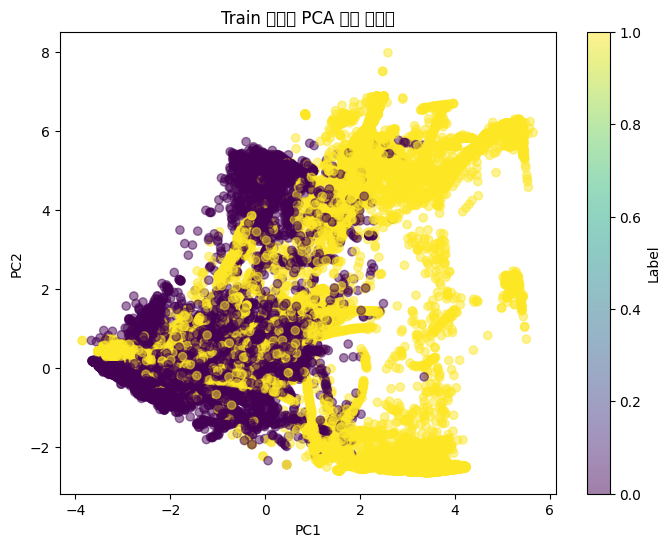

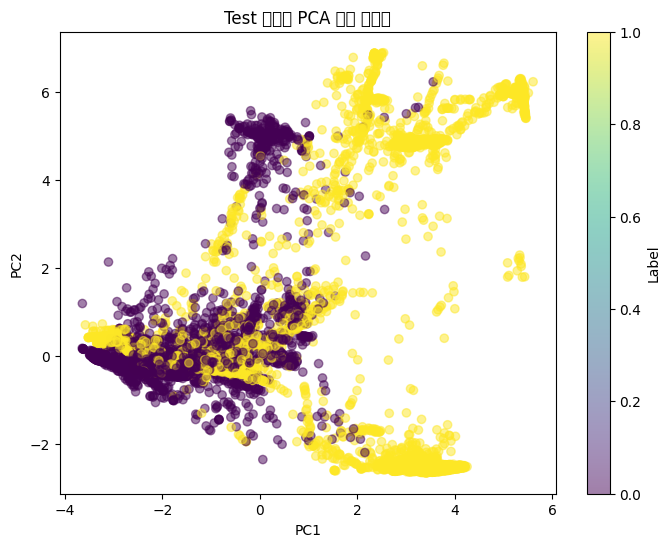

In [20]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


# 2. 데이터 스케일링 (Train에서 학습 후, Test에 적용)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Train 데이터에서 fit_transform
X_test_scaled = scaler.transform(X_test)       # Test 데이터에는 transform만 적용

# 3. PCA 학습 및 변환 (Train에서 학습 후, Test에 동일한 PCA 적용)
n_components = 25  # 원하는 차원 수 설정
pca = PCA(n_components=n_components)

X_train_pca = pca.fit_transform(X_train_scaled)  # Train 데이터에서 PCA 학습
X_test_pca = pca.transform(X_test_scaled)        # Test 데이터에 같은 PCA 적용

# 4. PCA 누적 분산 비율 확인
explained_variance_ratio = pca.explained_variance_ratio_.cumsum()
print("누적 분산 비율 (cumulative explained variance):")
print(explained_variance_ratio)

# 5. PCA 결과를 DataFrame으로 변환하고 label 병합
X_train_pca_df = pd.DataFrame(X_train_pca, columns=[f'PC{i+1}' for i in range(n_components)])
X_test_pca_df = pd.DataFrame(X_test_pca, columns=[f'PC{i+1}' for i in range(n_components)])

df_train_merged = X_train_pca_df.assign(label=y_train.values)
df_test_merged = X_test_pca_df.assign(label=y_test.values)

# 6. Label 데이터 타입 확인
print("Train Label 데이터 타입:", df_train_merged['label'].dtype)
print("Test Label 데이터 타입:", df_test_merged['label'].dtype)

# 7. 정렬 여부 확인
assert np.array_equal(y_train.values, df_train_merged['label'].values), "Train Label 순서 불일치!"
assert np.array_equal(y_test.values, df_test_merged['label'].values), "Test Label 순서 불일치!"

# 8. PCA 결과 시각화 (2D로 줄인 경우)
if n_components >= 2:
    plt.figure(figsize=(8, 6))
    plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis', alpha=0.5)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title('Train 데이터 PCA 결과 시각화')
    plt.colorbar(label='Label')
    plt.show()
    
    plt.figure(figsize=(8, 6))
    plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap='viridis', alpha=0.5)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title('Test 데이터 PCA 결과 시각화')
    plt.colorbar(label='Label')
    plt.show()


In [21]:
X_train = df_train_merged
X_test = df_test_merged

In [22]:
X_train_normal = X_train[X_train['label'] == 0]
X_train_normal.shape


(69334, 26)

In [23]:
y_test = X_test['label']
X_test = X_test.drop(labels='label', axis=1)

y_train_normal = X_train_normal['label']
X_train_normal = X_train_normal.drop(labels='label',axis=1)

In [24]:
X_test

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25
0,-2.220709,-0.285635,-0.258367,1.556037,-0.234308,-0.032290,-0.395975,0.292216,-0.004545,-0.683788,...,0.093626,0.024749,0.110607,2.781691,-0.576333,0.482633,-0.224092,-0.005404,0.221440,-0.192534
1,-2.873537,-0.237116,-0.051608,-0.418878,0.445067,-0.886163,-0.199791,0.099667,-0.025400,0.254732,...,0.055462,-0.105519,-0.041787,-0.382368,0.767774,-0.072792,-0.046177,0.642287,-0.514596,-0.019985
2,-2.925259,-0.185407,-0.045729,-0.716042,0.206995,-0.688812,-0.099786,0.079841,-0.048716,0.202381,...,0.068718,-0.091729,-0.035856,-0.376516,0.912354,-0.180528,-0.003578,0.745041,-0.377266,0.046404
3,-3.217717,-0.137278,-0.066012,-1.341489,-0.064072,-0.768637,-0.089905,0.187346,-0.410717,0.082957,...,0.088266,0.208910,0.431876,0.331236,-1.400557,0.695121,-0.414579,0.436966,-0.972977,-0.681290
4,2.785683,-2.506425,-0.041362,-0.528608,0.084338,-0.376663,0.154817,0.064541,0.080686,0.077537,...,0.085848,-0.109876,-0.087672,0.809177,0.660364,0.903793,-0.288889,-0.146089,-0.127537,0.438174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14847,1.894851,5.112389,0.030298,-0.582604,-0.511541,1.259341,-0.636449,0.215778,0.373997,0.056422,...,-0.038520,-0.471615,-0.615121,-0.135068,0.812015,-0.889425,0.511917,-0.931073,-0.679736,-1.908564
14848,-2.393111,-0.363393,-0.084339,0.544611,0.829973,-1.025340,-0.383895,0.117082,0.106404,0.329338,...,-0.030131,-0.134495,-0.117944,-0.233859,0.235537,0.329626,-0.052877,-0.402779,0.692063,0.061174
14849,3.379800,-2.634076,-0.130903,-0.088701,-0.261481,-0.247367,1.156489,-0.242197,0.143789,0.112857,...,0.139147,-0.149606,-0.076418,0.674839,0.964594,1.327338,-0.316213,-0.524507,-0.201196,-0.455391
14850,-2.029437,-0.409737,-0.388639,3.279219,-0.734578,0.173865,0.639808,-0.200010,0.144141,-0.355428,...,-0.009396,-0.014910,0.021282,1.634473,-0.002762,-0.063015,-0.060594,0.602566,0.316780,0.034384


In [25]:
y_test

0        0
1        0
2        0
3        0
4        1
        ..
14847    1
14848    0
14849    1
14850    0
14851    1
Name: label, Length: 14852, dtype: int64

In [26]:
import tensorflow as tf
from tensorflow.keras import optimizers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.utils import plot_model
import tensorflow as tf
from keras.layers import Input, Dropout, Dense, LSTM, TimeDistributed, RepeatVector, Conv1D, Conv1DTranspose
from keras.models import Model
from keras import regularizers
from keras_self_attention import SeqWeightedAttention, SeqSelfAttention
from keras.callbacks import EarlyStopping

In [27]:
import tensorflow as tf
from tensorflow.keras import layers, losses, Model, Input
import numpy as np
from tensorflow.keras import backend as K

latent_dim = 10
inter_dim = 20

# Sampling function for reparameterization trick
def sampling(args):
    z_mean, z_log_sigma = args
    batch_size = tf.shape(z_mean)[0]
    epsilon = K.random_normal(shape=(batch_size, latent_dim), mean=0., stddev=1.)
    return z_mean + z_log_sigma * epsilon

def vae_loss(x, x_decoded_mean, z_mean, z_log_sigma):
    reconstruction_loss = K.sum(K.square(x - x_decoded_mean), axis=1)
    kl_loss = -0.5 * K.sum(1 + z_log_sigma - K.square(z_mean) - K.exp(z_log_sigma), axis=-1)
    kl_loss_weighted = kl_loss * 0.001  # KL 다이버전스 손실에 가중치 부여
    total_loss = K.mean(reconstruction_loss + kl_loss_weighted)
    return total_loss

def cvae(X, labels):
    features = X.shape[1]  # 2D 데이터이므로 timesteps는 필요 없고, features만 사용
    input_x = Input(shape=(features,), name='InputFeatures')  # 2D 입력 (샘플, 특징)

    input_label = Input(shape=(1,), name='InputLabel')  # Assumes binary or multi-class label

    # Embed the label into the same shape as the input
    embedded_label = layers.Embedding(input_dim=2, output_dim=features)(input_label)  # Adjust output_dim to match features
    embedded_label = layers.Flatten()(embedded_label)

    # Concatenate input_x and embedded_label
    concatenated_input = layers.Concatenate()([input_x, embedded_label])

    # Reshape for Conv1D layer (to 3D)
    reshaped_input = layers.Reshape((features + embedded_label.shape[-1], 1))(concatenated_input)

    # Encoder with CNN layers
    h = layers.Conv1D(filters=64, kernel_size=3, activation="relu", padding='same')(reshaped_input)
    h = layers.Conv1D(filters=32, kernel_size=3, activation="relu", padding='same')(h)
    h = layers.Conv1D(filters=16, kernel_size=3, activation="relu", padding='same')(h)

    # Flatten for dense layers (MLP)
    h = layers.Flatten()(h)
    h = layers.Dense(inter_dim, activation='relu')(h)
    h = layers.Dense(inter_dim, activation='relu')(h)

    # z layer
    z_mean = layers.Dense(latent_dim)(h)
    z_log_sigma = layers.Dense(latent_dim)(h)
    z = layers.Lambda(sampling)([z_mean, z_log_sigma])

    # Decoder
    # Add the label to the latent space z
    z_with_label = layers.Concatenate()([z, embedded_label])

    # Expand for Conv1DTranspose layer
    decoder1 = layers.Dense((features + embedded_label.shape[-1]) * inter_dim)(z_with_label)
    decoder1 = layers.Reshape((features + embedded_label.shape[-1], inter_dim))(decoder1)

    # Decoder with CNN layers
    decoder1 = layers.Conv1DTranspose(filters=16, kernel_size=3, activation="relu", padding='same')(decoder1)
    decoder1 = layers.Conv1DTranspose(filters=32, kernel_size=3, activation="relu", padding='same')(decoder1)
    decoder1 = layers.Conv1DTranspose(filters=64, kernel_size=3, activation="relu", padding='same')(decoder1)

    # Flatten and final dense layer to reconstruct original features
    decoder1 = layers.Flatten()(decoder1)
    decoder1 = layers.Dense(features)(decoder1)
    
    model = Model([input_x, input_label], decoder1)
    model.add_loss(vae_loss(input_x, decoder1, z_mean, z_log_sigma))
    
    return model

# Create CVAE model
model = cvae(X_train_normal, y_train_normal)
model.summary()

from tensorflow.keras.callbacks import EarlyStopping
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005), metrics=['accuracy'])
# Create an EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)

# Compile and train the model with early stopping
history = model.fit([X_train_normal, y_train_normal], X_train_normal,
                    shuffle=True,
                    epochs=50, 
                    validation_split=0.1,  
                    batch_size=32,
                    callbacks=[early_stopping]).history

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 InputLabel (InputLayer)        [(None, 1)]          0           []                               
                                                                                                  
 embedding (Embedding)          (None, 1, 25)        50          ['InputLabel[0][0]']             
                                                                                                  
 InputFeatures (InputLayer)     [(None, 25)]         0           []                               
                                                                                                  
 flatten (Flatten)              (None, 25)           0           ['embedding[0][0]']              
                                                                                              

                                                                                                  
 tf.__operators__.add_1 (TFOpLa  (None,)             0           ['tf.math.reduce_sum[0][0]',     
 mbda)                                                            'tf.math.multiply_1[0][0]']     
                                                                                                  
 tf.math.reduce_mean (TFOpLambd  ()                  0           ['tf.__operators__.add_1[0][0]'] 
 a)                                                                                               
                                                                                                  
 add_loss (AddLoss)             ()                   0           ['tf.math.reduce_mean[0][0]']    
                                                                                                  
Total params: 149,671
Trainable params: 149,671
Non-trainable params: 0
_____________________________________

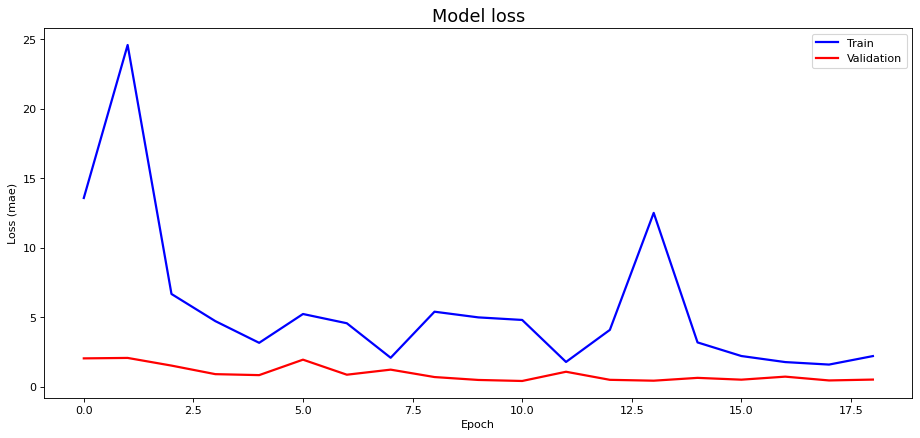

In [28]:
# plot the training losses
fig, ax = plt.subplots(figsize=(14, 6), dpi=80)
ax.plot(history['loss'], 'b', label='Train', linewidth=2)
ax.plot(history['val_loss'], 'r', label='Validation', linewidth=2)
ax.set_title('Model loss', fontsize=16)
ax.set_ylabel('Loss (mae)')
ax.set_xlabel('Epoch')
ax.legend(loc='upper right')
plt.show()

In [29]:
def flatten(X):
    flattened_X = np.empty((X.shape[0], X.shape[2]))  # sample x features array.
    for i in range(X.shape[0]):
        flattened_X[i] = X[i, (X.shape[1]-1), :]
    return(flattened_X)

In [30]:
valid_x_predictions = model.predict([X_test, y_test])
#mse = np.mean(np.power(flatten(test_X_selected) - flatten(valid_x_predictions), 2), axis=1)

mse = np.mean(np.power(X_test - valid_x_predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test.tolist()})

465/465 [==============================] - 2s 4ms/step


In [31]:
error_df

,reconstruction_error,true_class
0,0.003458,0
1,0.000826,0
2,0.001634,0
3,0.003400,0
4,1.421250,1
...,...,...
14847,0.895095,1
14848,0.001281,0
14849,1.657699,1
14850,0.001611,0


In [32]:
error_df[error_df['true_class']==0]

,reconstruction_error,true_class
0,0.003458,0
1,0.000826,0
2,0.001634,0
3,0.003400,0
5,0.056531,0
...,...,...
14843,0.001572,0
14844,0.006300,0
14846,0.003030,0
14848,0.001281,0


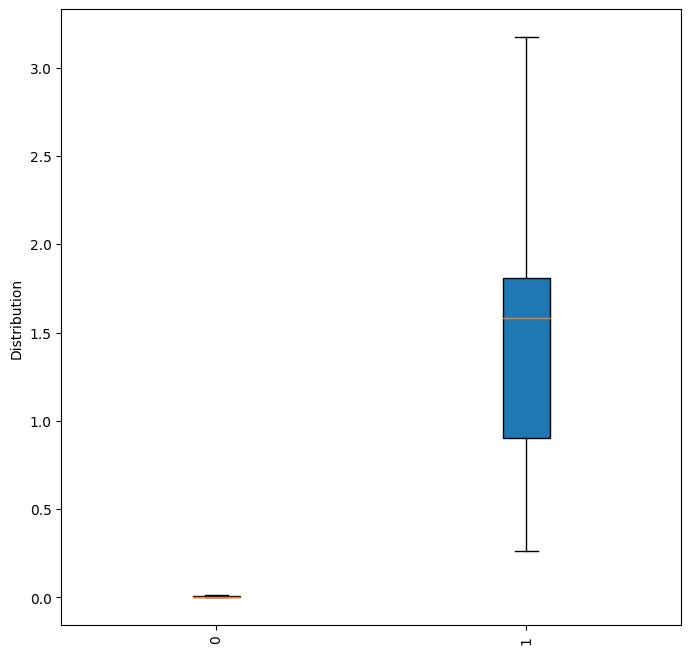

In [33]:
import matplotlib.pyplot as plt

# 데이터프레임 준비
true_class = error_df['true_class'].astype(str)
reconstruction_error = error_df['reconstruction_error']

# 박스 플롯 그리기
plt.figure(figsize=(8, 8))
plt.boxplot(
    [reconstruction_error[true_class == cls] for cls in sorted(true_class.unique())],
    labels=sorted(true_class.unique()),
    showfliers=False,
    vert=True,
    patch_artist=True
)

plt.ylabel('Distribution')
plt.xticks(rotation=90)
plt.show()


Best threshold: 0.30000000000000004
Best F1 score: 0.9933673113174615


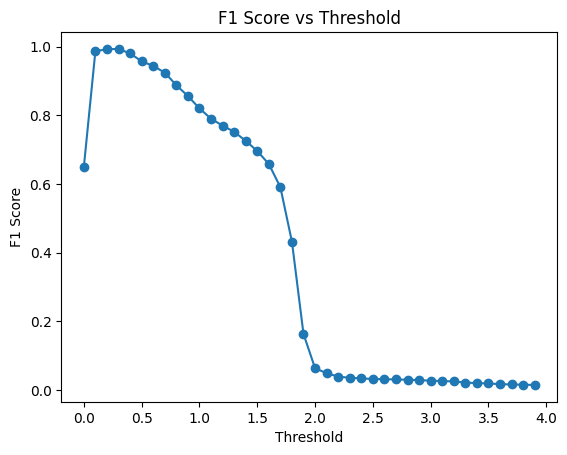

In [34]:


import numpy as np
from sklearn.metrics import f1_score

# Define the range of threshold values
threshold_range = np.arange(0, 4, 0.1)

# List to store F1 scores for each threshold
f1_scores = []

# Loop through each threshold and calculate F1 score
for threshold in threshold_range:
    y_pred = [0 if e < threshold else 1 for e in error_df.reconstruction_error.values]
    f1 = f1_score(error_df.true_class, y_pred)
    f1_scores.append(f1)

# Find the threshold with the highest F1 score
best_threshold = threshold_range[np.argmax(f1_scores)]
best_f1_score = max(f1_scores)

print(f"Best threshold: {best_threshold}")
print(f"Best F1 score: {best_f1_score}")

# Optionally, you can plot the F1 scores across the threshold range
plt.plot(threshold_range, f1_scores, marker='o')
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.title('F1 Score vs Threshold')
plt.show()


In [35]:
# 그래프 보고 threshold 결정 0.35
threshold = best_threshold

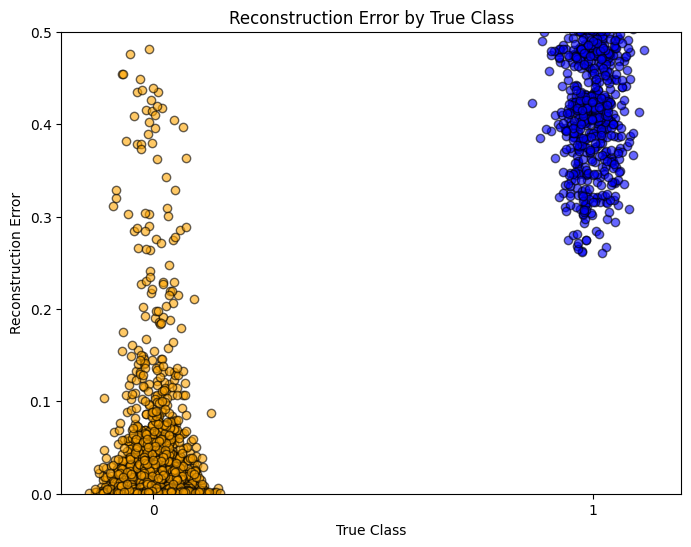

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Prepare the data for plotting
true_class_0 = error_df[error_df['true_class'] == 0]['reconstruction_error']
true_class_1 = error_df[error_df['true_class'] == 1]['reconstruction_error']

# Create the figure and axes with a specified y-axis limit
plt.figure(figsize=(8, 6))

# Add jitter to avoid overlapping points in the scatter plot
x_0 = np.random.normal(1, 0.04, size=len(true_class_0))  # Jitter for class 0
x_1 = np.random.normal(2, 0.04, size=len(true_class_1))  # Jitter for class 1

# Create the scatter plot
plt.scatter(x_0, true_class_0, color='orange', alpha=0.6, edgecolor='black', label='Class 0')
plt.scatter(x_1, true_class_1, color='blue', alpha=0.6, edgecolor='black', label='Class 1')

# Set y-axis limit
plt.ylim(0, 0.5)

# Set x-axis labels and adjust ticks
plt.xticks([1, 2], ['0', '1'])
plt.xlabel('True Class')

# Set y-axis label and title
plt.ylabel('Reconstruction Error')
plt.title('Reconstruction Error by True Class')

# Display the plot
plt.show()


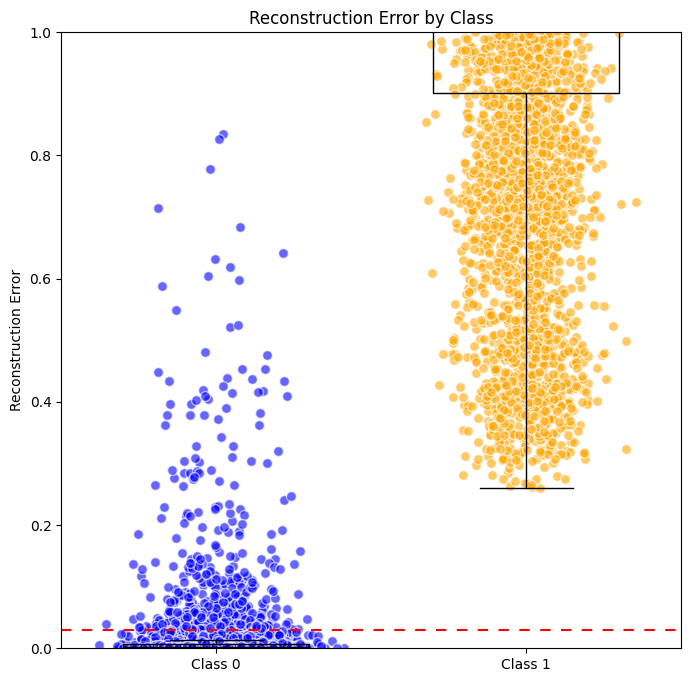

In [37]:
import matplotlib.pyplot as plt
import numpy as np

# Prepare the data for plotting
true_class_0 = error_df[error_df['true_class'] == 0]['reconstruction_error']
true_class_1 = error_df[error_df['true_class'] == 1]['reconstruction_error']

# Create the figure and axes
fig, ax = plt.subplots(figsize=(8, 8))

# Create a swarm plot equivalent using scatter plot with more jitter
x_0 = np.random.normal(1, 0.1, size=len(true_class_0))  # Increased jitter for class 0
x_1 = np.random.normal(2, 0.1, size=len(true_class_1))  # Increased jitter for class 1

ax.scatter(x_0, true_class_0, color='blue', alpha=0.6, label='Class 0', edgecolor='w', s=50)
ax.scatter(x_1, true_class_1, color='orange', alpha=0.6, label='Class 1', edgecolor='w', s=50)

# Create boxplots
ax.boxplot([true_class_0, true_class_1], positions=[1, 2], widths=0.6, patch_artist=True, 
           showfliers=False, boxprops=dict(facecolor='None', color='black'),
           medianprops=dict(color='black'), whiskerprops=dict(color='black'))

# Set x-axis labels
ax.set_xticks([1, 2])
ax.set_xticklabels(['Class 0', 'Class 1'])

# Add a horizontal line at the threshold
ax.axhline(y=0.03, xmin=0.0, xmax=1, dashes=(5, 5), color='red')

# Adjust y-axis limit to make sure the threshold line is visible
#ax.set_ylim(bottom=min(min(true_class_0), min(true_class_1)) - 0.01, 
#           top=max(max(true_class_0), max(true_class_1)) + 0.01)
ax.set_ylim(bottom=0, top=1)
    
# Set labels and title
ax.set_ylabel('Reconstruction Error')
ax.set_title('Reconstruction Error by Class')

plt.show()


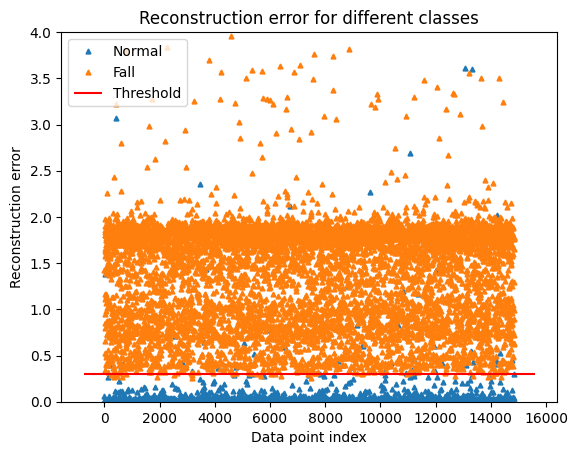

In [38]:
groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='^', ms=3.5, linestyle='',
            label= "Normal" if name == 0 else "Fall")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.set_ylim(0, 4)
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

<Figure size 1200x1200 with 0 Axes>

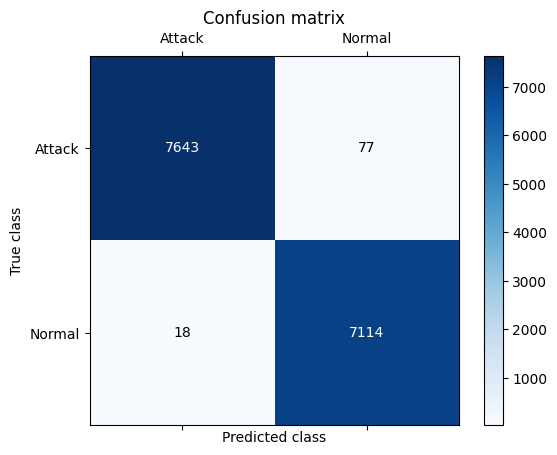

In [39]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# Assuming you have already defined LABELS, threshold, and y_pred

LABELS = ["Attack", "Normal"]

y_pred = [0 if e < threshold else 1 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)

# Create the figure and axis
plt.figure(figsize=(12, 12))
fig, ax = plt.subplots()

# Plot the confusion matrix using imshow
cax = ax.matshow(conf_matrix, cmap=plt.cm.Blues)

# Add color bar
plt.colorbar(cax)

# Set the labels for the axes
ax.set_xticks(np.arange(len(LABELS)))
ax.set_yticks(np.arange(len(LABELS)))

ax.set_xticklabels(LABELS)
ax.set_yticklabels(LABELS)

# Set labels and title
plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.title('Confusion matrix')

# Annotate the confusion matrix with the counts
for i in range(len(LABELS)):
    for j in range(len(LABELS)):
        ax.text(j, i, format(conf_matrix[i, j], 'd'),
                ha="center", va="center",
                color="white" if conf_matrix[i, j] > conf_matrix.max() / 2 else "black")

plt.show()


In [40]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score

precision, recall, f1,_ = precision_recall_fscore_support(y_test,y_pred,average='binary')
print ('Accuracy Score :',accuracy_score(error_df.true_class, y_pred) )
print ('Precision :',precision )
print ('Recall :',recall )
print ('F1 :',f1 )

Accuracy Score : 0.9936035550767573
Precision : 0.9892921707690169
Recall : 0.9974761637689288
F1 : 0.9933673113174615


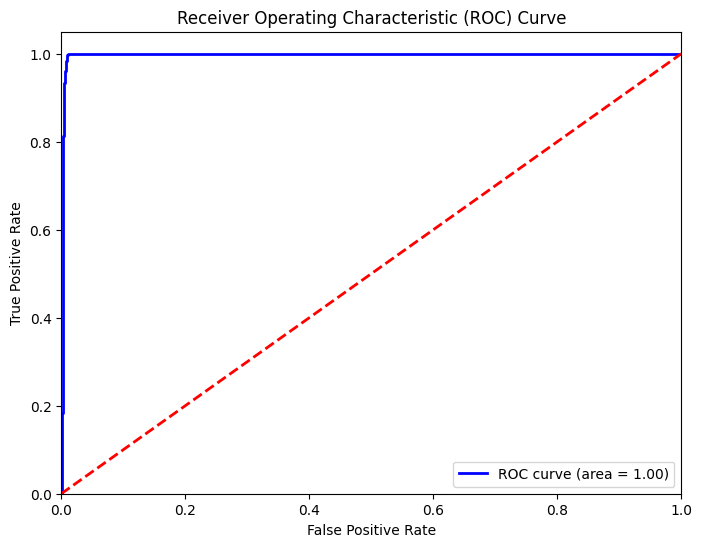

In [41]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Extract the true labels and reconstruction errors from error_df
y_true = error_df['true_class']
y_scores = error_df['reconstruction_error']

# Compute the False Positive Rate (FPR) and True Positive Rate (TPR) for different thresholds
fpr, tpr, thresholds = roc_curve(y_true, y_scores)

# Compute the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')

# Plot the diagonal line (random classifier)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')

# Set plot labels and title
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

# Display the plot
plt.show()


In [42]:
print(f"ROC Score : {roc_auc}")

ROC Score : 0.9971237784022386


In [43]:
# If error_df.true_class is a nested structure, flatten it
y_test = error_df.true_class.apply(lambda x: int(x[0][0]) if isinstance(x, list) else int(x))

# Ensure y_pred is a list of integers
y_pred = [0 if e < threshold else 1 for e in error_df.reconstruction_error.values]

# Now calculate the metrics
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')
print('Accuracy Score:', accuracy_score(y_test, y_pred))
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)


Accuracy Score: 0.9936035550767573
Precision: 0.9892921707690169
Recall: 0.9974761637689288
F1 Score: 0.9933673113174615
